In [2]:
import numpy as np 
import pandas as pd
import plotly.express as px 
import plotly.graph_objects as go
import plotly.io as pio
pio.templates
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline  



In [3]:
from sklearn.datasets import load_boston   
load_boston = load_boston()   
X = load_boston.data   
y = load_boston.target   

data = pd.DataFrame(X, columns=load_boston.feature_names)   
data['SalePrice'] = y # saleprice   
data.tail() 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalePrice
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [4]:

print(load_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    float64
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    float64
 9   TAX        506 non-null    float64
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  SalePrice  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None


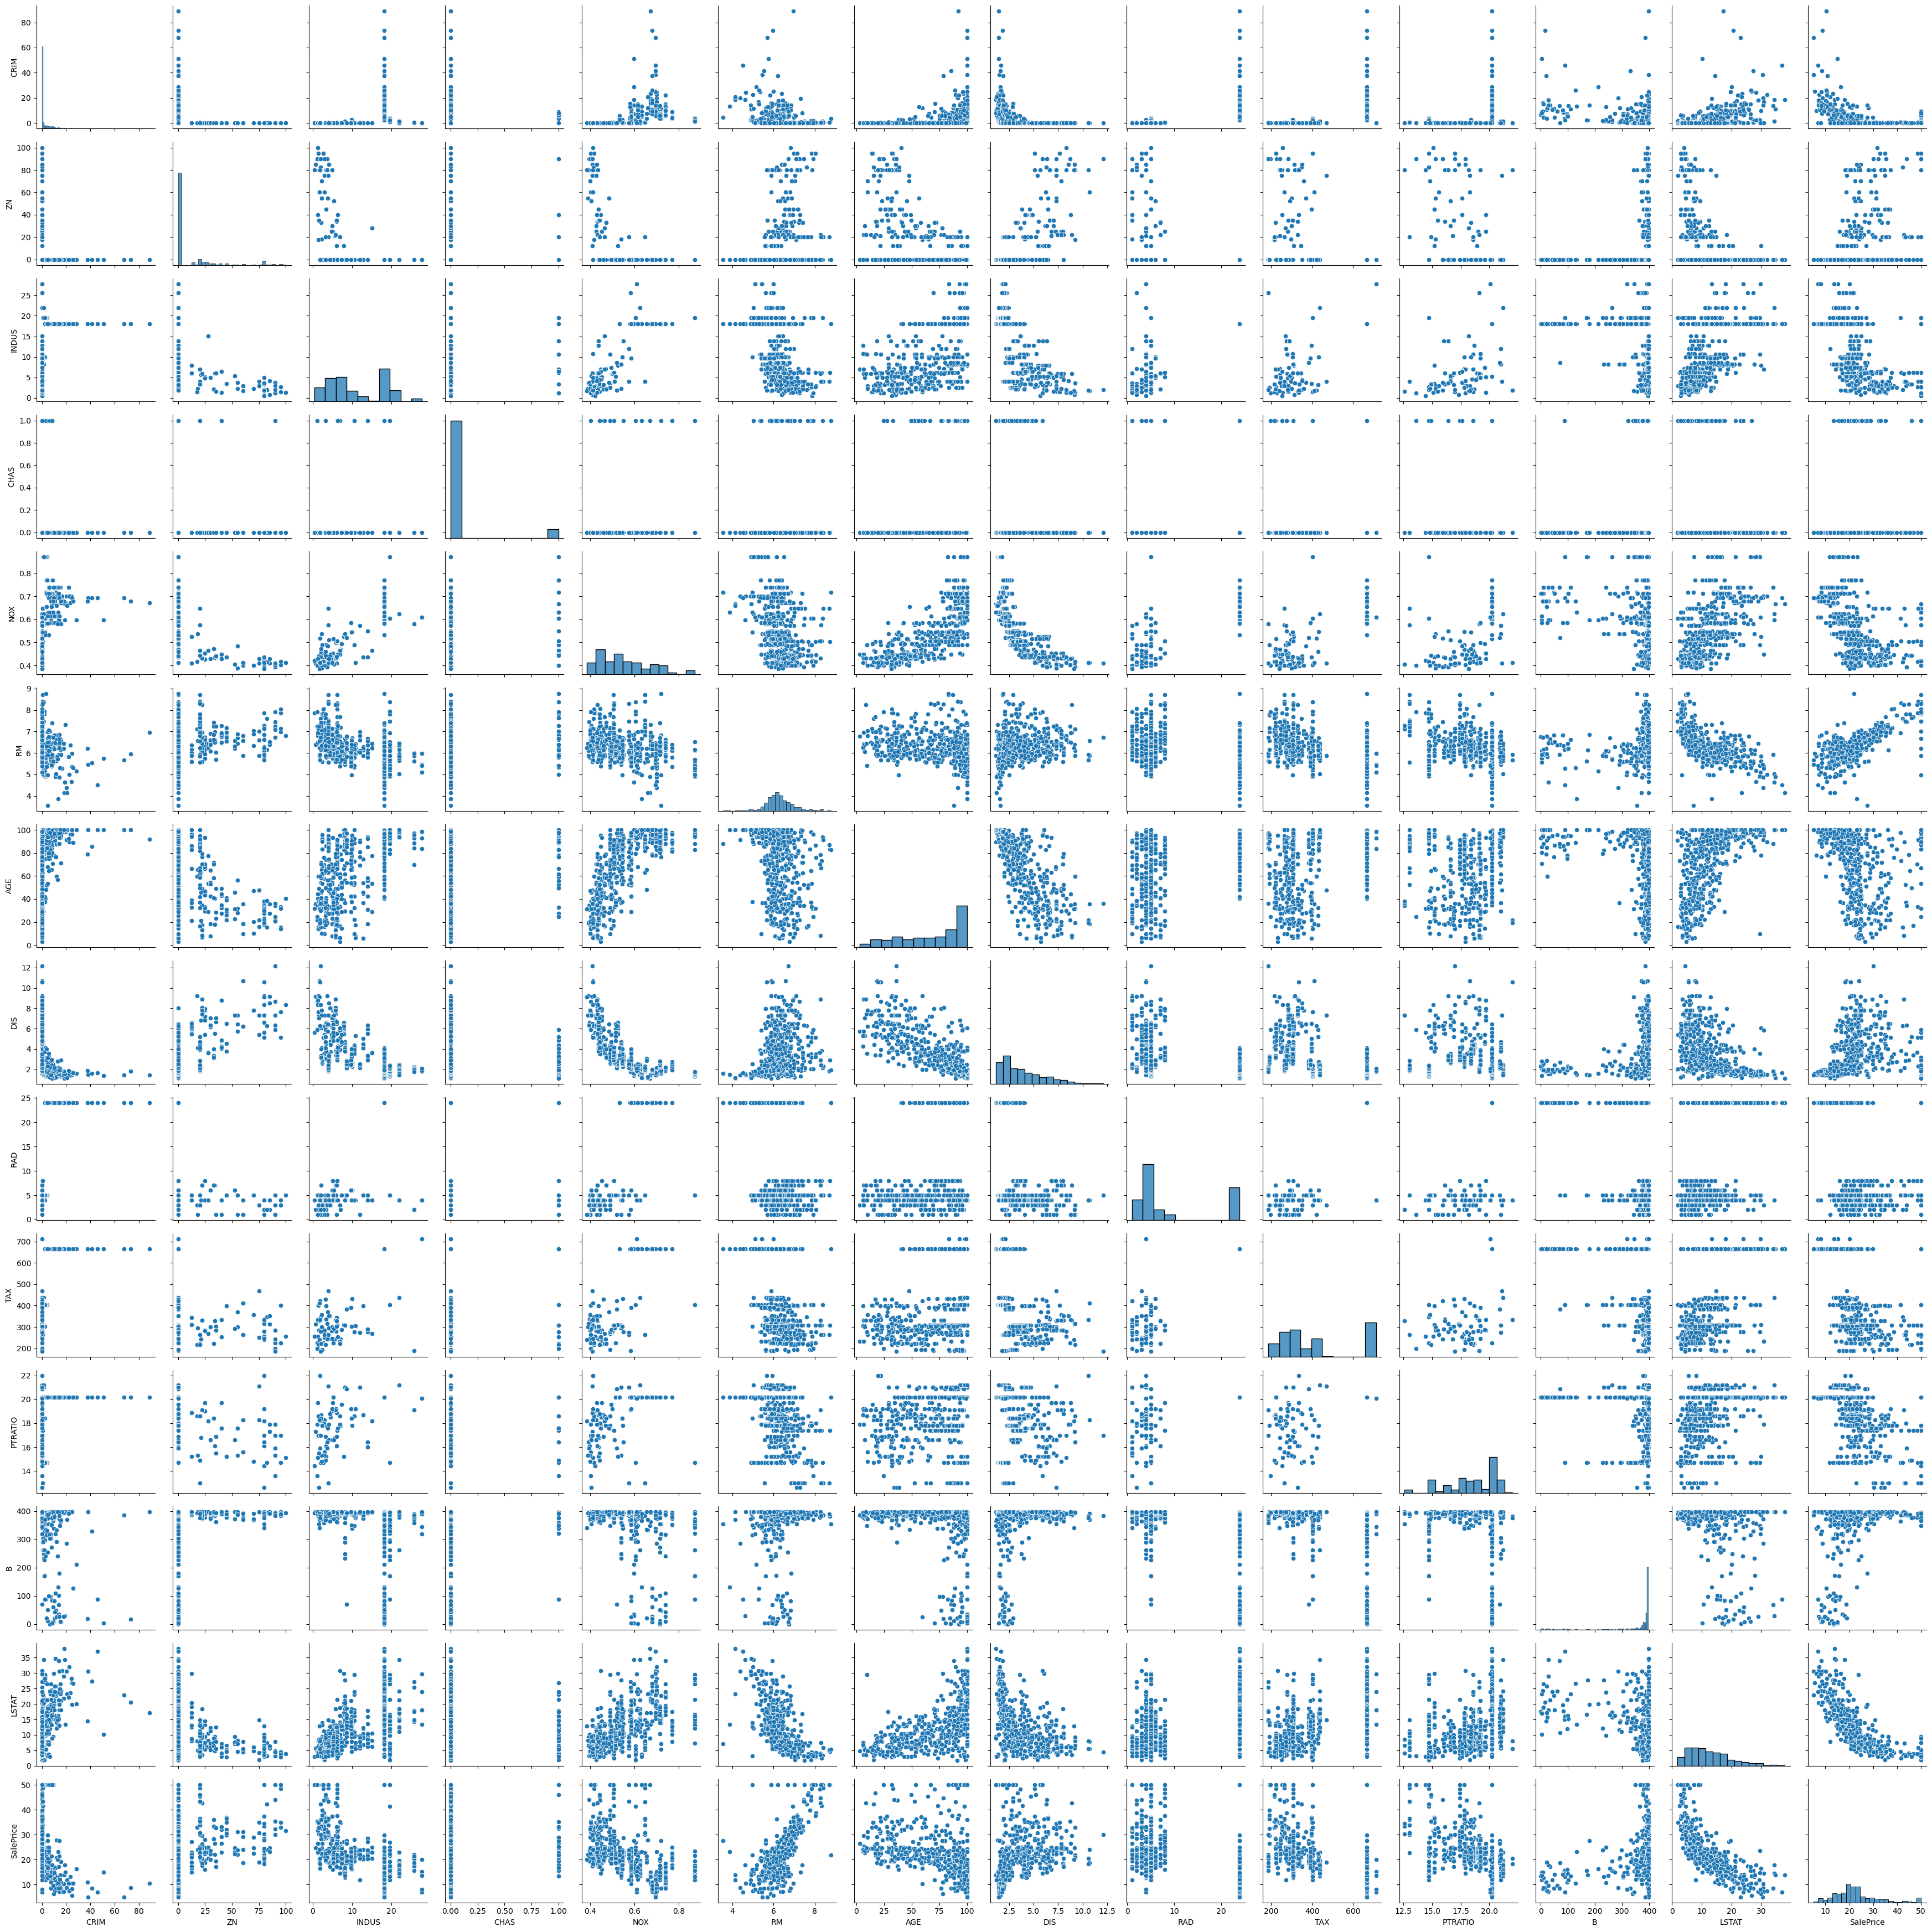

In [103]:
sns.pairplot(data,height=2.5)
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

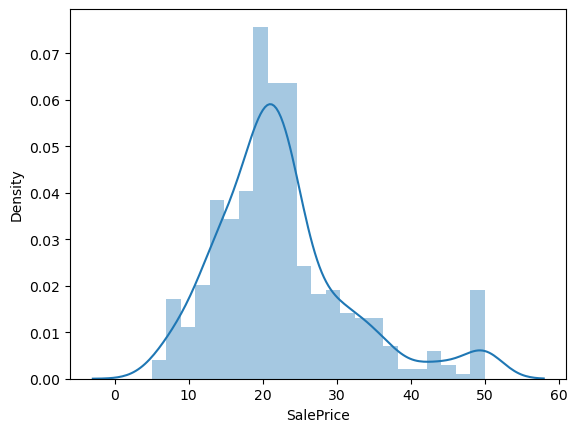

In [104]:
sns.distplot(data['SalePrice'])

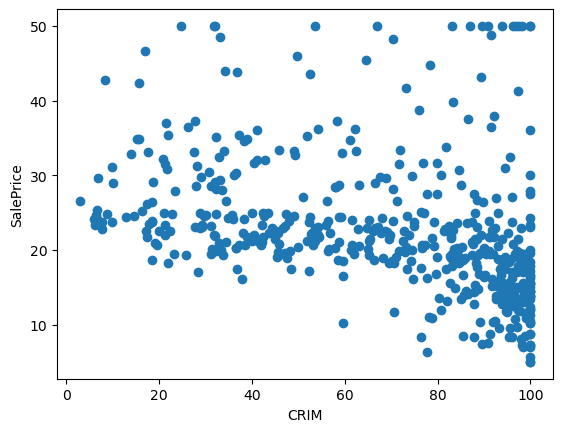

In [105]:
fig,ax=plt.subplots()
ax.scatter(x=data['AGE'],y=data['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('CRIM')
plt.show()

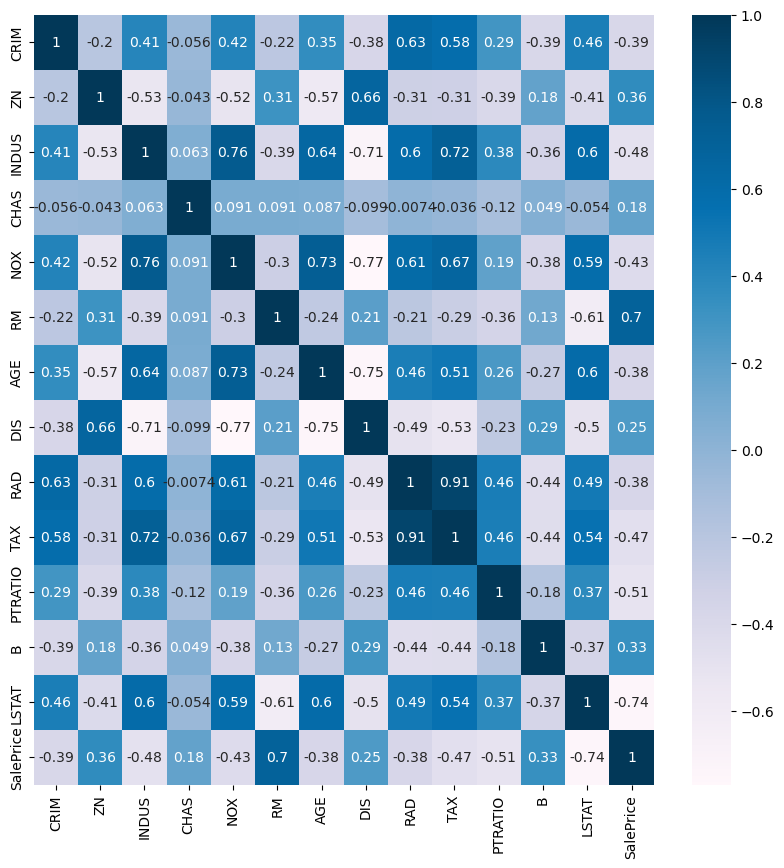

In [6]:
plt.figure(figsize=(10,10))
cor=data.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.PuBu)
plt.show()

In [7]:
cor_target=abs(cor['SalePrice'])
relavent_features=cor_target[cor_target>0.2]
names=[i for i ,value in relavent_features.iteritems()]
names.remove('SalePrice')
print(names)
print(len(names))

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
12


In [8]:
from sklearn.model_selection import train_test_split
x=data.drop('SalePrice',axis=1)
y=data['SalePrice']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)

x_train=x_train.reset_index()
x_train=x_train.drop('index',axis=1)
y_train=y_train.reset_index()
y_train=y_train.drop('index',axis=1)
x_test=x_test.reset_index()
x_test=x_test.drop('index',axis=1)
y_test=y_test.reset_index()
y_test=y_test.drop('index',axis=1)


In [9]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [10]:
predictions=lr.predict(x_test)
# print(x_test)
# print(y_test)
# print(predictions)
print('Actual ',y_test.loc[14]['SalePrice'])
print('Pre ',predictions[14])

Actual  18.8
Pre  [19.87021713]


In [13]:
from sklearn.metrics import mean_squared_error,r2_score

mse=mean_squared_error(y_test,predictions)
rmse=np.sqrt(mse)
r2=r2_score(y_test,predictions)
print(r2)

0.5058136899387844


SalePrice    0.505814
dtype: float64
